#### 4.study the motion of the five outer planets relative to the sun using different numerical integrators. For this problem I have read related papers about solar system.

In [1]:
# Data for outer solar system simulation
# Units: mass in solar mass, time in Earth day, length in astronomical unit
# Source: J.A.Barth. Ahnerts Kalender fur Sternfreunde 1994. Verlag
import numpy as np
    
g=2.95912208286e-4;         # the gravitational constant
m=[0]*6                 # masses
m[0]=1.00000597682         # Sun + inner planets
m[1]=9.54786104043e-4      # Jupiter
m[2]=2.85583733151e-4      # Saturn
m[3]=4.37273164546e-5      # Uranus
m[4]=5.17759138449e-5      # Neptune
m[5]=7.692307692307693e-9  # Pluto

x=[0]*36;               

# Initial positions at 1994-09-05, UTC0:00
x[0]=0                    # Sun
x[1]=0
x[2]=0

x[3]=-3.5023653          # Jupiter
x[4]=-3.8169847
x[5]=-1.5507963

x[6]= 9.0755314          # Saturn
x[7]=-3.0458353
x[8]=-1.6483708

x[9]=  8.3101420          # Uranus
x[10]=-16.2901086
x[11]= -7.2521278

x[12]= 11.4707666          # Neptune
x[13]=-25.7294829
x[14]=-10.8169456

x[15]=-15.5387357          # Pluto
x[16]=-25.2225594
x[17]= -3.1902382

# Initial velocities at 1994-09-05, UTC0:00
x[18]=0                    # Sun
x[19]=0
x[20]=0

x[21]= 0.00565429          # Jupiter
x[22]=-0.00412490
x[23]=-0.00190589

x[24]= 0.00168318          # Saturn
x[25]= 0.00483525
x[26]= 0.00192462

x[27]= 0.00354178          # Uranus
x[28]= 0.00137102
x[29]= 0.00055029

x[30]= 0.00288930          # Neptune
x[31]= 0.00114527
x[32]= 0.00039677

x[33]= 0.00276725          # Pluto
x[34]=-0.00170702
x[35]=-0.00136504

#compute initial momentunm p
# Initial momentunm at 1994-09-05, UTC0:00
x[18]=0*m[0]                    # Sun
x[19]=0*m[0]
x[20]=0*m[0]

x[21]= 0.00565429*m[1]          # Jupiter
x[22]=-0.00412490*m[1]
x[23]=-0.00190589*m[1]

x[24]= 0.00168318*m[2]         # Saturn
x[25]= 0.00483525*m[2]
x[26]= 0.00192462*m[2]

x[27]= 0.00354178*m[3]         # Uranus
x[28]= 0.00137102*m[3]
x[29]= 0.00055029*m[3]

x[30]= 0.00288930*m[4]         # Neptune
x[31]= 0.00114527*m[4]
x[32]= 0.00039677*m[4]

x[33]= 0.00276725*m[5]          # Pluto
x[34]=-0.00170702*m[5]
x[35]=-0.00136504*m[5]

x = np.array(x).reshape((-1, 1))

In [2]:
#formulate f and f's derivative
from copy import deepcopy
import matplotlib.pyplot as plt
J = np.zeros((36, 36))
for i in range(36):
    if i <= 17:
        J[i, 18+i] = 1.0
    else:
        J[i, i-18] = -1.0

def f_JH(y):
    q = y[0:18]
    p = y[18:36]
    grad = np.zeros(36)
    for i in range(6):
        for j in range(6):
            if j == i:
                continue
            d = np.sqrt((q[3*i]-q[3*j])**2+(q[3*i+1]-q[3*j+1])**2++(q[3*i+2]-q[3*j+2])**2)
            grad[3*i] = grad[3*i] + g*m[i]*m[j]*(q[3*i]-q[3*j])/d**3
            grad[3*i+1] = grad[3*i+1] + g*m[i]*m[j]*(q[3*i+1]-q[3*j+1])/d**3
            grad[3*i+2] = grad[3*i+2] + g*m[i]*m[j]*(q[3*i+2]-q[3*j+2])/d**3
    for i in range(6, 12):
        index = i-6
        grad[3*i] = p[3*index]/m[index]
        grad[3*i+1] = p[3*index+1]/m[index]
        grad[3*i+2] = p[3*index+2]/m[index]
        
    return np.dot(J, grad)

def cal_distance(y):
    T = y.shape[0]
    dis = np.zeros((T, 5))
    for t in range(T):
        dis[t][0] = np.linalg.norm(y[t,3:6]-y[t,0:3])
        dis[t][1] = np.linalg.norm(y[t,6:9]-y[t,0:3])
        dis[t][2] = np.linalg.norm(y[t,9:12]-y[t,0:3])
        dis[t][3] = np.linalg.norm(y[t,12:15]-y[t,0:3])
        dis[t][4] = np.linalg.norm(y[t,15:18]-y[t,0:3])
    return dis

#### a.Explicit Euler with stepsize 10 days

In [3]:
def explicit_Euler(func_name, y_init, t_range, h):
    #y_init is the initial condition and numpy array with shape dx1
    #t_range is the range we want our answer
    d = y_init.shape[0]
    num_interval = int((t_range[1]-t_range[0])/h)
    t_init = t_range[0]
    
    s_t = [(t_init + i*h) for i in range(num_interval+1)]
    y_t = np.zeros((num_interval+1, d))
    y_t[0,:] = y_init.reshape(y_t[0,:].shape)
    
    for i in range(1, num_interval+1):
        f_v = eval(func_name)(deepcopy(y_t[i-1,:]))
        y_t[i,:] = y_t[i-1,:]+h*f_v
    return s_t, y_t, num_interval

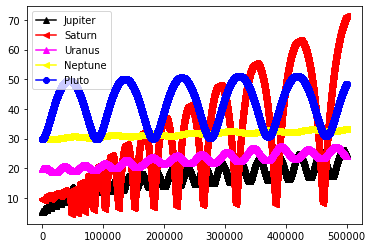

In [4]:
t_range = [0, 5e5]
h = 10
s_t, y_t, num_interval = explicit_Euler(func_name='f_JH', y_init=deepcopy(x), t_range=t_range, h=h)
dis = cal_distance(y_t)
plt.plot(s_t, dis[:,0], color='black', marker='^')
plt.plot(s_t, dis[:,1], color='red', marker='<')
plt.plot(s_t, dis[:,2], color='magenta', marker='^')
plt.plot(s_t, dis[:,3], color='yellow', marker='<')
plt.plot(s_t, dis[:,4], color='blue', marker='8')
plt.legend(['Jupiter', 'Saturn', 'Uranus', 'Neptune','Pluto'], loc='upper left')
plt.show()

Here I print the distances of five outer planets to the sun against time since the sun barely moves and is the center of this solar system. We can see that Nepture is doing circular motion around the sun. The pluto is probably doing elliptic motionelliptical motion around the sun. For other planets, the explicit Euler method showed they are leaving the sun and this may be caused by the unstability of the method.

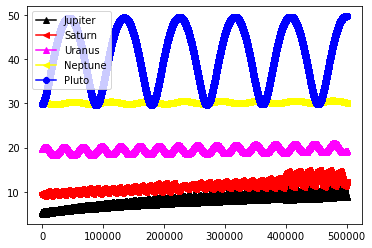

In [15]:
t_range = [0, 5e5]
h = 1
s_t, y_t, num_interval = explicit_Euler(func_name='f_JH', y_init=deepcopy(x), t_range=t_range, h=h)
dis = cal_distance(y_t)
plt.plot(s_t, dis[:,0], color='black', marker='^')
plt.plot(s_t, dis[:,1], color='red', marker='<')
plt.plot(s_t, dis[:,2], color='magenta', marker='^')
plt.plot(s_t, dis[:,3], color='yellow', marker='<')
plt.plot(s_t, dis[:,4], color='blue', marker='8')
plt.legend(['Jupiter', 'Saturn', 'Uranus', 'Neptune','Pluto'], loc='upper left')
plt.show()

Here I use a smaller step and we can see that in fact Saturn, Uranus and Jupiter are not leaving the sun and instead they are running around the sun. Previous experiment's result is caused by the large h.

#### b.Implicit Euler with stepsize 10 days

In [5]:
def fix_point_solver(init_guess, yn, func_name, h, error0=1e-6, max_iter=1000):
    #here we use simple func iteration method to solve this equation
    #func_name origin function and diff_func is its derivative.
    error = 1.0
    guess = deepcopy(init_guess)
    iter = 0
    while((error > error0) and (iter < max_iter)):
        previous = guess
        guess = yn + h*eval(func_name)(deepcopy(guess))
        error = np.linalg.norm(guess-previous)
        iter = iter + 1
    return guess, iter

def implicit_Euler(func_name, y_init, t_range, h):
    #y_init is the initial condition and numpy array with shape dx1
    #t_range is the range we want our answer
    d = y_init.shape[0]
    num_interval = int((t_range[1]-t_range[0])/h)
    t_init = t_range[0]
    
    s_t = [(t_init + i*h) for i in range(num_interval+1)]
    y_t = np.zeros((num_interval+1, d))
    y_t[0,:] = y_init.reshape(y_t[0,:].shape)
    
    sum_iter = num_interval
    for i in range(1, num_interval+1):
        y_t[i,:], iter = fix_point_solver(deepcopy(y_t[i-1,:]), deepcopy(y_t[i-1,:]), func_name, h)
        sum_iter = sum_iter + iter
    return s_t, y_t, sum_iter

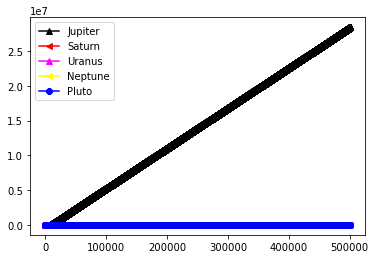

In [6]:
#t_range = [0, 5e5]
t_range = [0, 5e5]
#h = 1
h = 10
s_t, y_t, num_interval = implicit_Euler(func_name='f_JH', y_init=deepcopy(x), t_range=t_range, h=h)
dis = cal_distance(y_t)
plt.plot(s_t, dis[:,0], color='black', marker='^')
plt.plot(s_t, dis[:,1], color='red', marker='<')
plt.plot(s_t, dis[:,2], color='magenta', marker='^')
plt.plot(s_t, dis[:,3], color='yellow', marker='<')
plt.plot(s_t, dis[:,4], color='blue', marker='8')
plt.legend(['Jupiter', 'Saturn', 'Uranus', 'Neptune','Pluto'], loc='upper left')
plt.show()

Here I implemented the implicit-ruler via the fix-point method and we can see it is not stable.

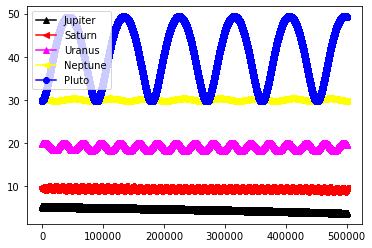

In [16]:
#t_range = [0, 5e5]
t_range = [0, 5e5]
#h = 1
h = 0.1
s_t, y_t, num_interval = implicit_Euler(func_name='f_JH', y_init=deepcopy(x), t_range=t_range, h=h)
dis = cal_distance(y_t)
plt.plot(s_t, dis[:,0], color='black', marker='^')
plt.plot(s_t, dis[:,1], color='red', marker='<')
plt.plot(s_t, dis[:,2], color='magenta', marker='^')
plt.plot(s_t, dis[:,3], color='yellow', marker='<')
plt.plot(s_t, dis[:,4], color='blue', marker='8')
plt.legend(['Jupiter', 'Saturn', 'Uranus', 'Neptune','Pluto'], loc='upper left')
plt.show()

Here I reduce the step size h of the implicit method. It worked out much better.We can see that Saturn， Nepture and Jupiter are doing circular motion around the sun. The pluto and Uranus are doing elliptic motionelliptical motion around the sun， and the cycle of Pluto is about three times longer than that of Uranus.

#### (c) Your favorite Runge-Kutta method of order at least 2, with stepsize 30 days

In [7]:
def Runge_Kutta(func_name, y_init, t_range, h):
    #y_init is the initial condition and numpy array with shape dx1
    #t_range is the range we want our answer
    d = y_init.shape[0]
    num_interval = int((t_range[1]-t_range[0])/h)
    t_init = t_range[0]
    
    s_t = [(t_init + i*h) for i in range(num_interval+1)]
    y_t = np.zeros((num_interval+1, d))
    y_t[0,:] = y_init.reshape(y_t[0,:].shape)
    
    for i in range(1, num_interval+1):
        s1 = eval(func_name)(deepcopy(y_t[i-1,:]))
        s2 = eval(func_name)(deepcopy(y_t[i-1,:])+h*s1/2)
        s3 = eval(func_name)(deepcopy(y_t[i-1,:])+h*s2/2)
        s4 = eval(func_name)(deepcopy(y_t[i-1,:])+h*s3)
        y_t[i,:] = y_t[i-1,:]+h*(s1/6+s2/3+s3/3+s4/6)
    return s_t, y_t, 4*num_interval

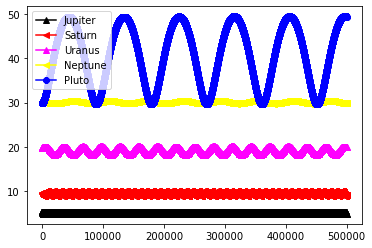

In [8]:
#t_range = [0, 5e5]
t_range = [0, 5e5]
#h = 1
h = 30
s_t, y_t, num_interval = Runge_Kutta(func_name='f_JH', y_init=deepcopy(x), t_range=t_range, h=h)
dis = cal_distance(y_t)
plt.plot(s_t, dis[:,0], color='black', marker='^')
plt.plot(s_t, dis[:,1], color='red', marker='<')
plt.plot(s_t, dis[:,2], color='magenta', marker='^')
plt.plot(s_t, dis[:,3], color='yellow', marker='<')
plt.plot(s_t, dis[:,4], color='blue', marker='8')
plt.legend(['Jupiter', 'Saturn', 'Uranus', 'Neptune','Pluto'], loc='upper left')
plt.show()

Here we use a larger stepsize but get a much more stable result. This is because Runge_Kutta method has the order of four.

#### (d) Symplectic Euler with stepsize 100 days

In [9]:
def Symplectic_Euler(func_name, y_init, t_range, h):
    #y_init is the initial condition and numpy array with shape dx1
    #t_range is the range we want our answer
    d = y_init.shape[0]
    num_interval = int((t_range[1]-t_range[0])/h)
    t_init = t_range[0]
    
    s_t = [(t_init + i*h) for i in range(num_interval+1)]
    y_t = np.zeros((num_interval+1, d))
    y_t[0,:] = y_init.reshape(y_t[0,:].shape)
    
    for i in range(1, num_interval+1):
        #update q
        f_v = eval(func_name)(deepcopy(y_t[i-1,:]))
        y_t[i,0:18] = y_t[i-1, 0:18]+h*f_v[0:18]
        #prepare for next
        tmp = deepcopy(y_t[i-1,:])
        tmp[0:18] = deepcopy(y_t[i, 0:18])
        #update p
        f_v = eval(func_name)(tmp)
        y_t[i,18:36] = y_t[i-1, 18:36]+h*f_v[18:36]
    return s_t, y_t, num_interval

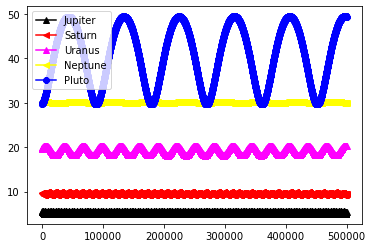

In [10]:
#t_range = [0, 5e5]
t_range = [0, 5e5]
#h = 1
h = 100
s_t, y_t, num_interval = Symplectic_Euler(func_name='f_JH', y_init=deepcopy(x), t_range=t_range, h=h)
dis = cal_distance(y_t)
plt.plot(s_t, dis[:,0], color='black', marker='^')
plt.plot(s_t, dis[:,1], color='red', marker='<')
plt.plot(s_t, dis[:,2], color='magenta', marker='^')
plt.plot(s_t, dis[:,3], color='yellow', marker='<')
plt.plot(s_t, dis[:,4], color='blue', marker='8')
plt.legend(['Jupiter', 'Saturn', 'Uranus', 'Neptune','Pluto'], loc='upper left')
plt.show()

Like Explicit Euler, Symplectic Euler is the first-order method but it is much more accurate even with a larger step size h. This is because 
Symplectic Euler is a symplectic integrator, unlike the standard method. As a consequence, the Symplectic Euler method almost conserves the energy (when the Hamiltonian is time-independent). Often, the energy increases steadily when the standard Euler method is applied, making it far less accurate.(I get some information from wikipedia.)

#### Stormer-Verlet with stepsize 200 days

In [13]:
def SV_Euler(func_name, y_init, t_range, h):
    #y_init is the initial condition and numpy array with shape dx1
    #t_range is the range we want our answer
    d = y_init.shape[0]
    num_interval = int((t_range[1]-t_range[0])/h)
    t_init = t_range[0]
    
    s_t = [(t_init + i*h) for i in range(num_interval+1)]
    y_t = np.zeros((num_interval+1, d))
    y_t[0,:] = y_init.reshape(y_t[0,:].shape)
    
    for i in range(1, num_interval+1):
        #first step of updating p
        tmp_p = y_t[i-1, 18:36]+h/2*eval(func_name)(deepcopy(y_t[i-1,:]))[18:36]
        tmp_y = deepcopy(y_t[i-1,:])
        tmp_y[18:36] = deepcopy(tmp_p)
        #update q
        y_t[i, 0:18] = y_t[i-1, 0:18] + h*eval(func_name)(deepcopy(tmp_y))[0:18]
        #second step of updating p
        tmp_y2 = deepcopy(y_t[i-1,:])
        tmp_y2[0:18] = deepcopy(y_t[i, 0:18])
        y_t[i, 18:36] = tmp_p + h/2*eval(func_name)(deepcopy(tmp_y2))[18:36]
    return s_t, y_t, num_interval

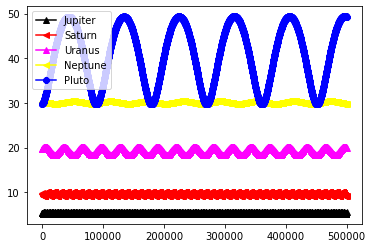

In [14]:
#t_range = [0, 5e5]
t_range = [0, 5e5]
#h = 1
h = 200
s_t, y_t, num_interval = SV_Euler(func_name='f_JH', y_init=deepcopy(x), t_range=t_range, h=h)
dis = cal_distance(y_t)
plt.plot(s_t, dis[:,0], color='black', marker='^')
plt.plot(s_t, dis[:,1], color='red', marker='<')
plt.plot(s_t, dis[:,2], color='magenta', marker='^')
plt.plot(s_t, dis[:,3], color='yellow', marker='<')
plt.plot(s_t, dis[:,4], color='blue', marker='8')
plt.legend(['Jupiter', 'Saturn', 'Uranus', 'Neptune','Pluto'], loc='upper left')
plt.show()

We can see that the SV method is very stable. The SV method has order of two and  are symplectic. Thus the SV method can almost conserves the energy.